In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys, time
root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log'

off_depth_turtle/model_canyon_rl_turtle_1
found 1023 val losses and 1023 train losses
off_depth_turtle/model_canyon_rl_turtle_2
found 999 val losses and 999 train losses
off_depth_turtle/model_canyon_rl_turtle_3
found 999 val losses and 999 train losses


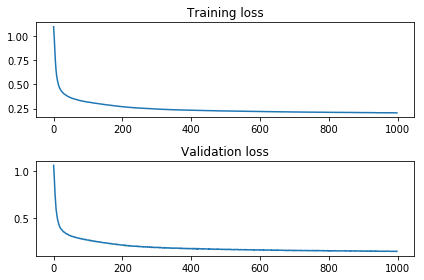

In [41]:
# Offline collision Q net train and validation loss convergence
val_loss={}
train_loss={}
model_dirs=['off_depth_turtle/model_canyon_rl_turtle_1','off_depth_turtle/model_canyon_rl_turtle_2','off_depth_turtle/model_canyon_rl_turtle_3']
# model_dirs=['off_coll_turtle/model_ce_1', 'off_coll_turtle/model_ce_2', 'off_coll_turtle/model_ce_3']
# 1. extract log file for different models
for model_dir in model_dirs :
    print model_dir
    # model_dir='off_coll_turtle/model_ce_1'
    cpdirs=[d for d in os.listdir(root_dir+'/'+model_dir) if os.path.isdir(root_dir+'/'+model_dir+'/'+d) and d.startswith('2018')  and not d.endswith('eval')]
    if len(cpdirs) != 1: 
        print("Found {0} potential checkpoint dirs: {1}".format(len(cpdirs), cpdirs))
        exit
    else:
        log=open(root_dir+'/'+model_dir+'/'+cpdirs[0]+'/tf_log','r')
        loglines=log.readlines()
        log.close()
        val_loss[model_dir]=[float(l.split(',')[0].split(':')[1][:-1]) for l in loglines if not 'test' in l]    
        train_loss[model_dir]=[float(l.split(',')[1].split(':')[1][:-1]) for l in loglines if not 'test' in l]
        print('found {0} val losses and {1} train losses'.format(len(val_loss[model_dir]), len(train_loss[model_dir])))

# 2. Process data to create mean and variance values
minimum_loss_length=min([len(loss[model_dir]) for loss in [val_loss, train_loss] for model_dir in model_dirs])
for loss in [train_loss, val_loss]:
    loss['mean']=[np.mean([loss[m][li] for m in loss.keys()]) for li in range(minimum_loss_length)]
    loss['var']=[np.var([loss[m][li] for m in loss.keys()]) for li in range(minimum_loss_length)]
# print train_loss['mean']
# print train_loss['var']
# print val_loss['mean']
# print val_loss['var']

# 3. create nice graph plotting different models
plt.subplot(2,1,1)
plt.title('Training loss')
# for m in model_dirs: plt.plot(train_loss[m][:minimum_loss_length])
plt.errorbar(range(minimum_loss_length), train_loss['mean'], yerr=train_loss['var'])
plt.subplot(2,1,2)
plt.title('Validation loss')
# for m in model_dirs: plt.plot(val_loss[m][:minimum_loss_length])
plt.errorbar(range(minimum_loss_length), val_loss['mean'], yerr=val_loss['var'])
plt.tight_layout()
plt.show()

In [32]:
loss=train_loss

[0.654957950115,
 0.582427918911,
 0.542791187763,
 0.518715381622,
 0.5020378232,
 0.487081378698,
 0.481991589069,
 0.462420284748,
 0.44883736968,
 0.448794752359,
 0.433304905891,
 0.448623895645,
 0.442877262831,
 0.431198716164,
 0.423665642738,
 0.411515325308,
 0.416966319084,
 0.405931502581,
 0.405265122652,
 0.402515292168,
 0.41565784812,
 0.397801935673,
 0.402557939291,
 0.408184200525,
 0.40248131752,
 0.399316519499,
 0.395311057568,
 0.397988170385,
 0.392973512411,
 0.391097515821,
 0.369700163603,
 0.390826642513,
 0.400665283203,
 0.396581143141,
 0.385212868452,
 0.390983939171,
 0.3891697824,
 0.376387864351,
 0.370299845934,
 0.37849894166,
 0.356733977795,
 0.372835308313,
 0.362276643515,
 0.380147069693,
 0.363989859819,
 0.377291798592,
 0.378931701183,
 0.366049915552,
 0.367424398661,
 0.366052061319,
 0.377033948898,
 0.377130687237,
 0.357015222311,
 0.350475817919,
 0.35756033659,
 0.371896028519,
 0.363395422697,
 0.351697742939,
 0.347707509995,
 0.364